In [2]:
%load_ext autoreload
%autoreload 2
import os
from utils.face_analyzer import FaceAnalyzer

face_analyzer = FaceAnalyzer()
participant_id = "PP1"
frames = face_analyzer.get_video_frames_for_participant(
    participant_id, True, "./MIT/Videos/", num_selected_frames=20)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
./MIT/Videos/PP1.avi


# Facial Features

### Face Mesh

In [2]:
for frame in frames:
    detected_faces_landmarks = face_analyzer.process_image_results(frame.image)
    frame.facial_landmarks_obj= face_analyzer.get_largest_face_landmarks_obj(frame.image, detected_faces_landmarks)
    if frame.facial_landmarks_obj:
        frame.facial_landmarks = frame.facial_landmarks_obj.landmark

### Face

In [3]:

for frame in frames:
    if frame.facial_landmarks:
        frame.face = face_analyzer.get_face_coordinates(frame.facial_landmarks, frame.image)

### Smile

In [4]:
import numpy as np


SMOOTH_WINDOW = 5
happiness_buffer = []
def smooth_happiness(happiness_prob):
    if happiness_prob is None:
        return 0 # TODO: change?
    happiness_buffer.append(happiness_prob)
    if len(happiness_buffer) > SMOOTH_WINDOW:
        happiness_buffer.pop(0)
    return np.mean(happiness_buffer)


for i, frame in enumerate(frames):
    face_roi = face_analyzer.get_face_roi_image(frame.image, frame.face, expand_ratio=1.1)
    frame.smile = smooth_happiness(face_analyzer.get_smile_from_frame(face_roi))

### Selected Facial Features

In [5]:
for frame in frames:
    frame.two_landmarks_connectors = face_analyzer.get_selected_facial_landmarks(frame.facial_landmarks)

### Head Pose

In [6]:

texts = []
for frame in frames:
    result = face_analyzer.get_face_angles(frame.image, frame.facial_landmarks)
    frame.face_angles = result

# Prosodic Extraction

In [ ]:
from models.model_features import ProsodicFeatures
from utils.prosody_analyzer import ProsodyAnalyzer


prosody_analyzer = ProsodyAnalyzer(participant_id)
prosodic_features: ProsodicFeatures = prosody_analyzer.extract_all_features()

# Features Storage

### Facial Features Aggregation

In [9]:
from utils.feature_storage import FeatureStorage

feature_storage = FeatureStorage("./interview_features.csv")
facial_features = feature_storage.aggregate_facial_features(frames)

IndexError: list index out of range

In [ ]:
from utils.feature_storage import FeatureStorage

feature_storage.save_to_csv(participant_id, prosodic_features, facial_features)

# Display Frames

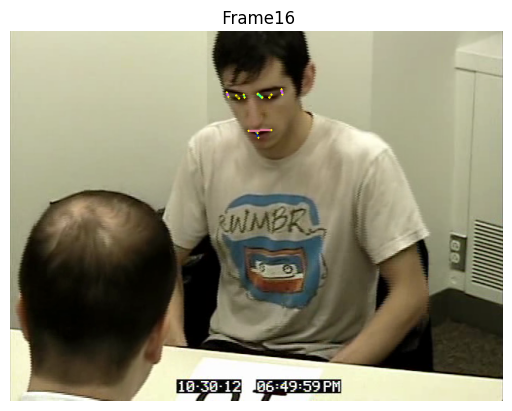

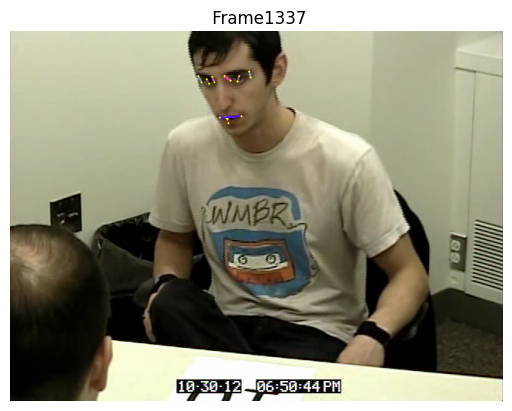

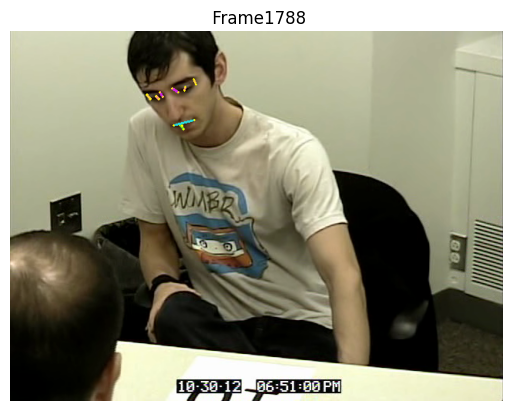

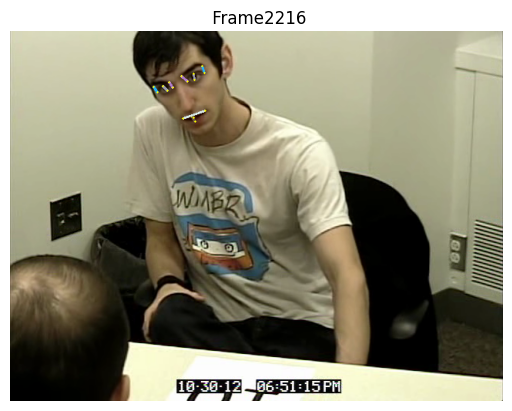

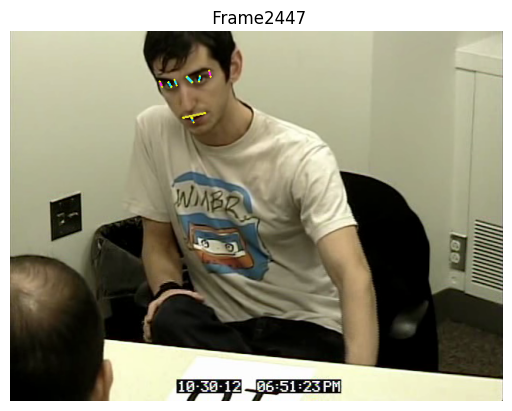

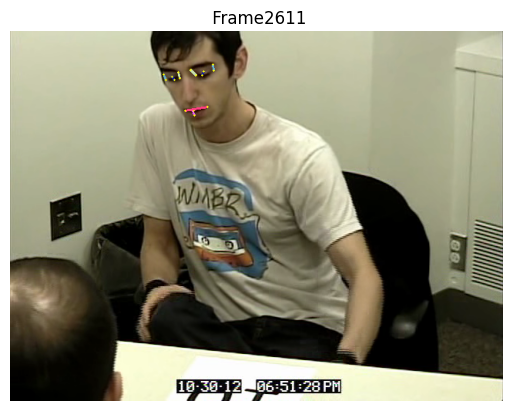

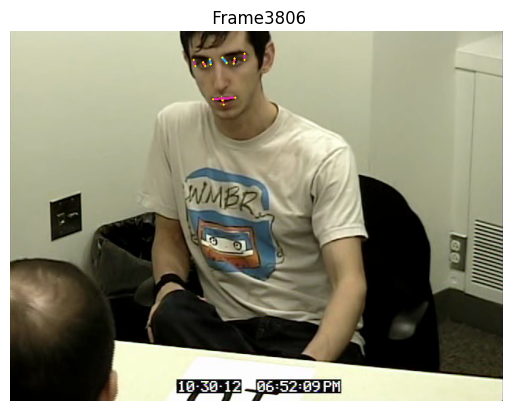

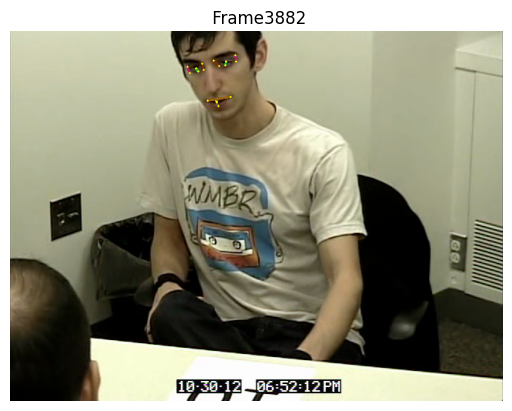

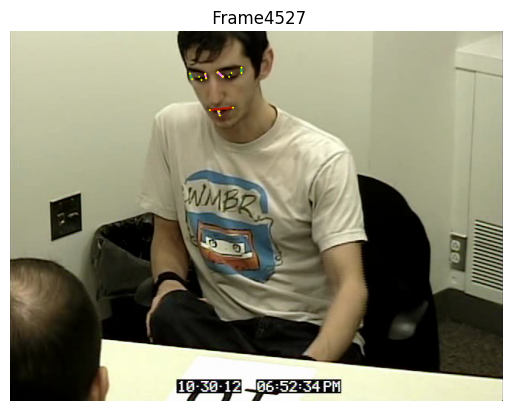

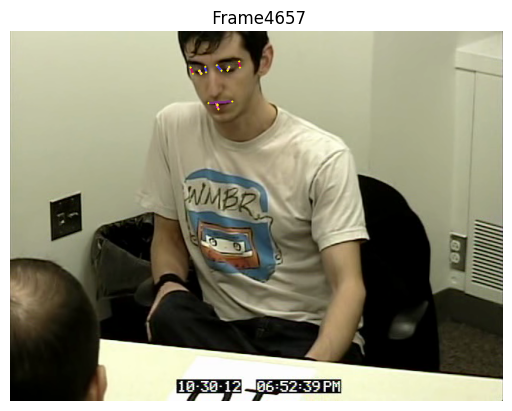

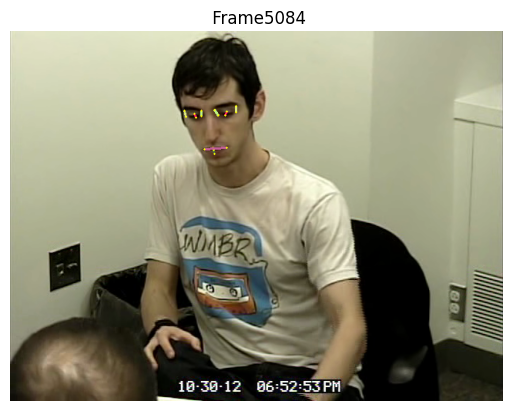

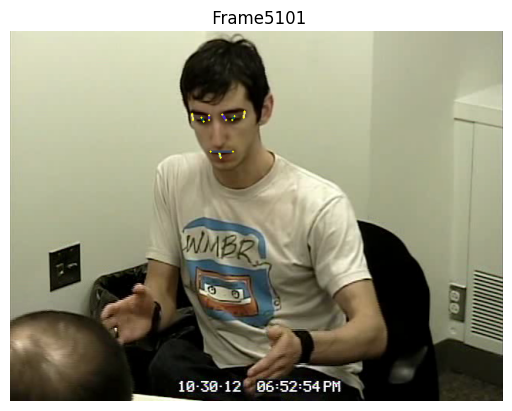

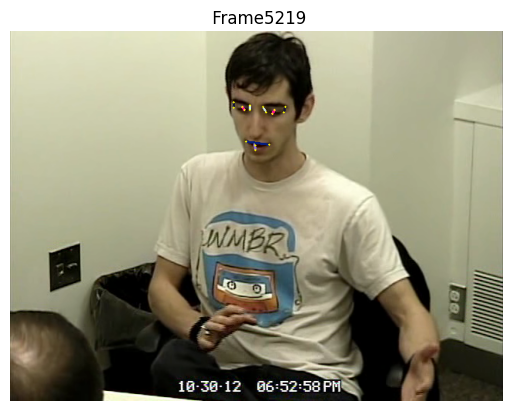

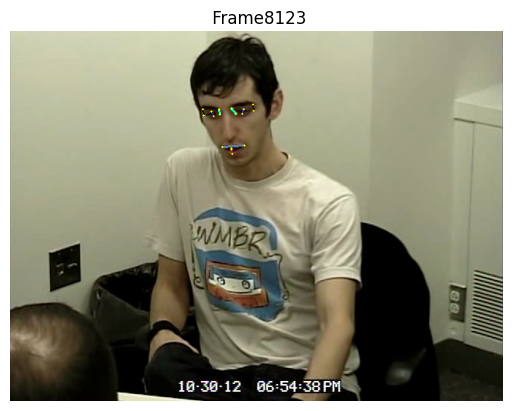

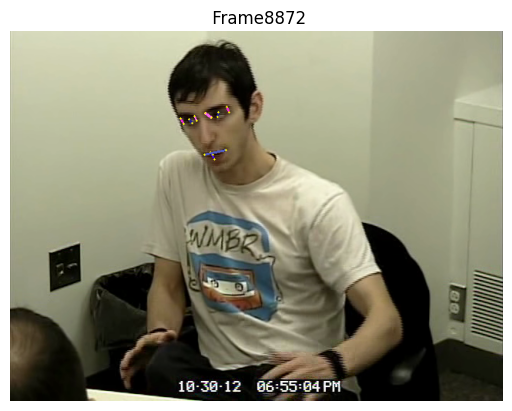

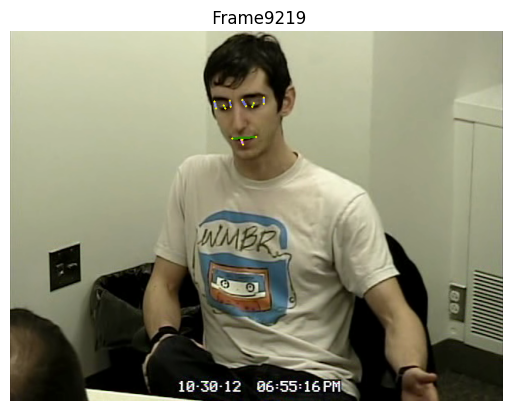

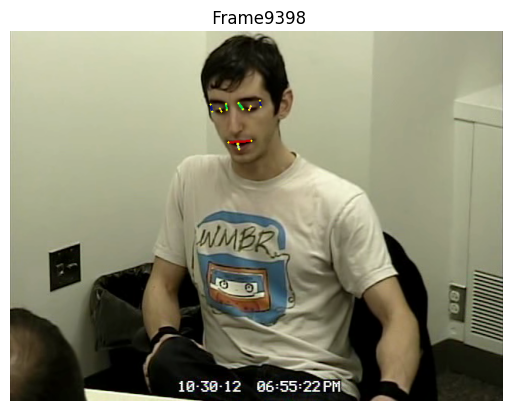

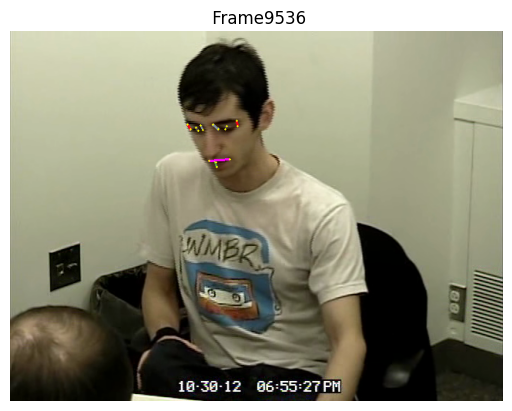

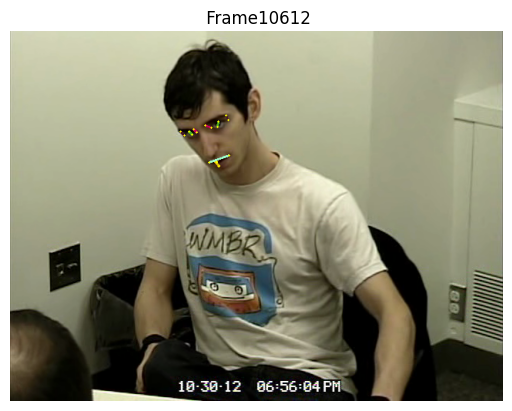

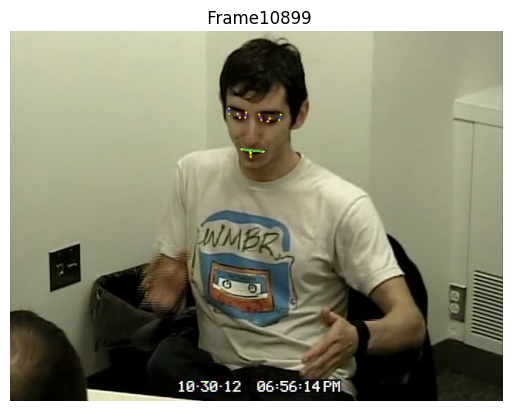

In [ ]:
# for frame in frames:
#     frame.reset_drawable_image()
    # frame.draw_face()
    # frame.draw_smile()
    # frame.draw_selected_facial_landmarks(draw_lines=True)
    
    # frame.put_face_angles()
    # frame.draw_facial_landmarks()
    # frame.display()